# Proyek Predictive Analytics: Apple Quality
---


- **Nama:** Kemal Aziz
- **Email:** kemal.aziz03@gmail.com
- **ID Dicoding:** kstarid

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Mengunggah kredensial Kaggle
from google.colab import files
files.upload()  # Unggah file kaggle.json yang Anda dapatkan dari akun Kaggle Anda

# Membuat direktori .kaggle dan memindahkan file kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [17]:
# Unduh dataset
!kaggle datasets download -d nelgiriyewithana/apple-quality

# Ekstrak file ZIP
!unzip apple-quality.zip -d apple-quality


Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality
License(s): other
apple-quality.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  apple-quality.zip
replace apple-quality/apple_quality.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: apple-quality/apple_quality.csv  


In [36]:
df = pd.read_csv('/content/apple-quality/apple_quality.csv', skipfooter=1, engine='python')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


# Data Exploration

In [37]:
# Drop A_id column as it's just an identifier
df = df.drop('A_id', axis=1)

In [38]:
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [39]:
# Check the distribution of the target variable
print("\n--- Target Variable Distribution ---")
print(df['Quality'].value_counts())
print(df['Quality'].value_counts(normalize=True) * 100)


--- Target Variable Distribution ---
Quality
good    2004
bad     1996
Name: count, dtype: int64
Quality
good    50.1
bad     49.9
Name: proportion, dtype: float64


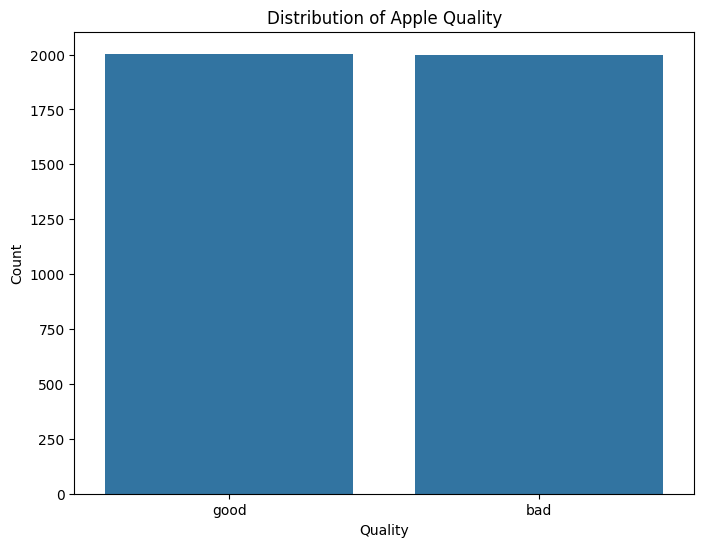

In [40]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Quality', data=df)
plt.title('Distribution of Apple Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()
plt.close()

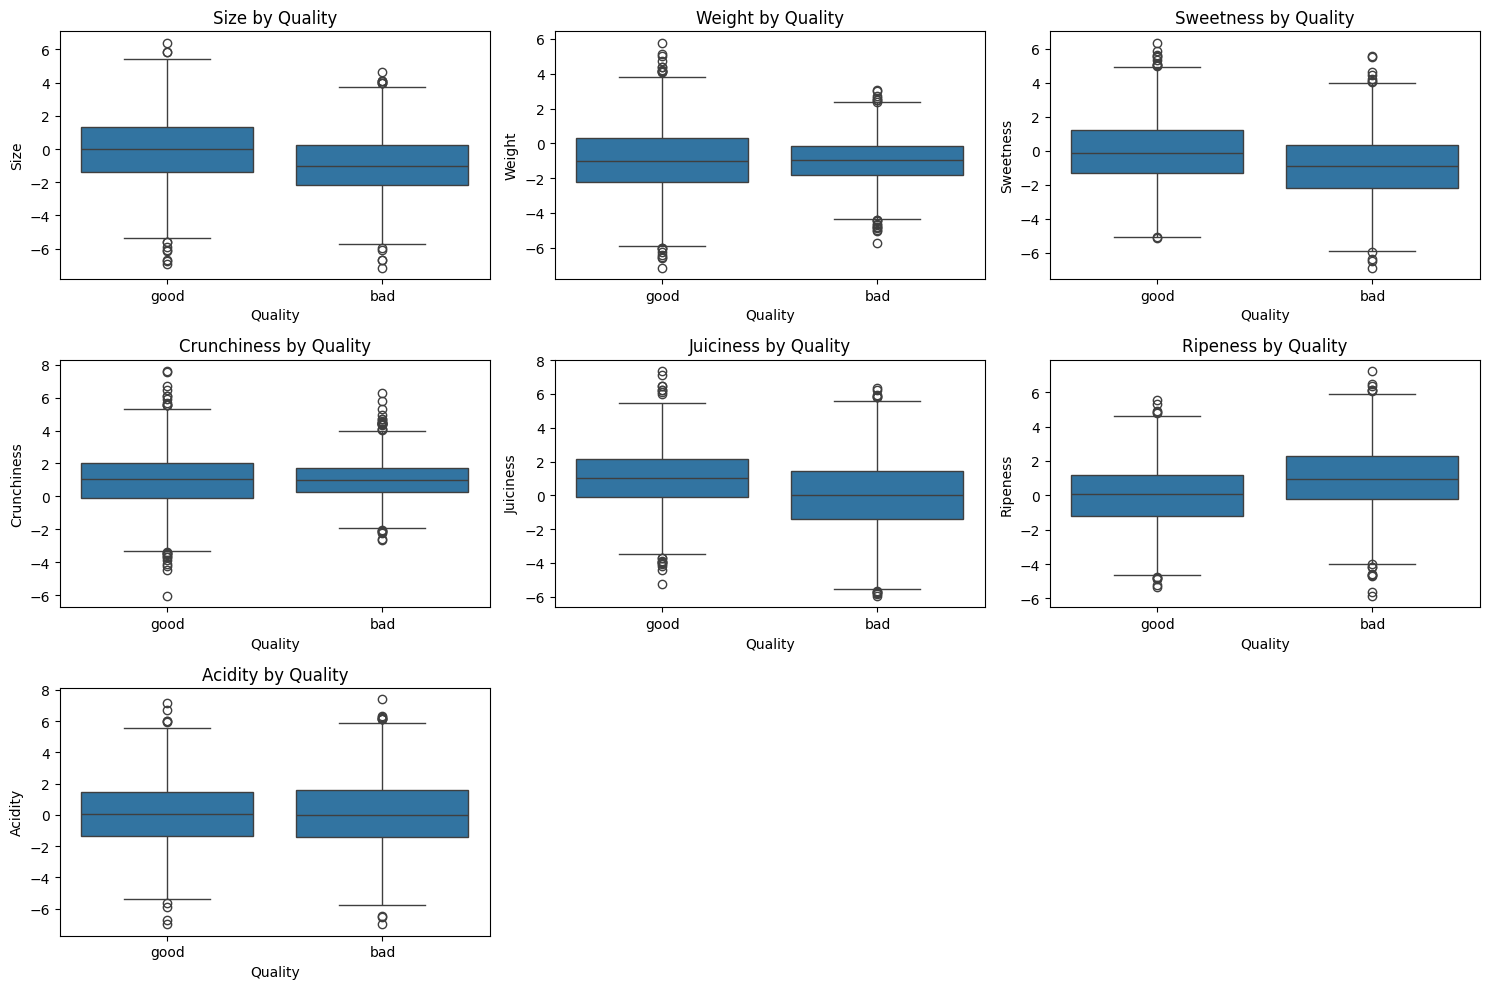

In [42]:
# Visualize feature distributions by quality
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Quality', y=column, data=df)
    plt.title(f'{column} by Quality')
plt.tight_layout()
plt.show()
plt.close()

# Pre-Processing

In [43]:
# Prepare data for modeling
print("\n--- Preparing Data for Modeling ---")
X = df.drop('Quality', axis=1)
y = df['Quality']

# Convert target to binary (0 for 'bad', 1 for 'good')
y = y.map({'bad': 0, 'good': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


--- Preparing Data for Modeling ---
Training set size: (3200, 7)
Testing set size: (800, 7)


In [44]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelling

In [45]:
# Train a Random Forest model
print("\n--- Training Random Forest Model ---")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)


--- Training Random Forest Model ---


RandomForestClassifier(random_state=42)

In [46]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluation

In [47]:
# Evaluate the model
print("\n--- Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


--- Model Evaluation ---
Accuracy: 0.89625

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       401
           1       0.89      0.90      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



In [48]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion Matrix:
[[356  45]
 [ 38 361]]


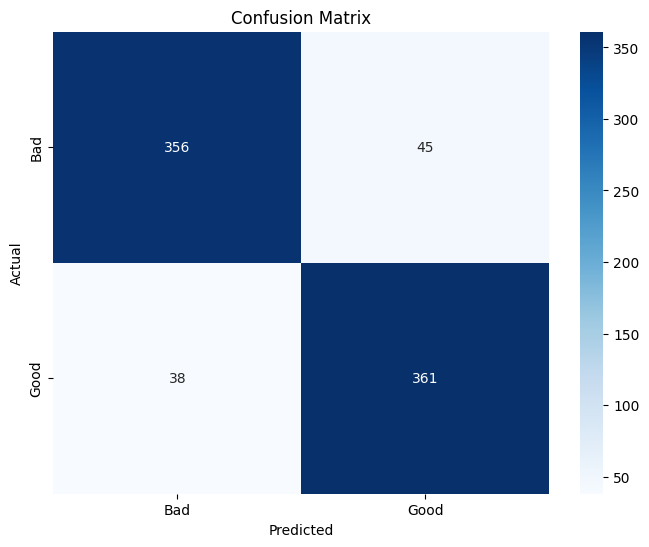

In [49]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
plt.close()


--- Feature Importance ---
       Feature  Importance
5     Ripeness    0.167724
0         Size    0.162871
4    Juiciness    0.156634
2    Sweetness    0.151104
6      Acidity    0.133286
1       Weight    0.118328
3  Crunchiness    0.110052


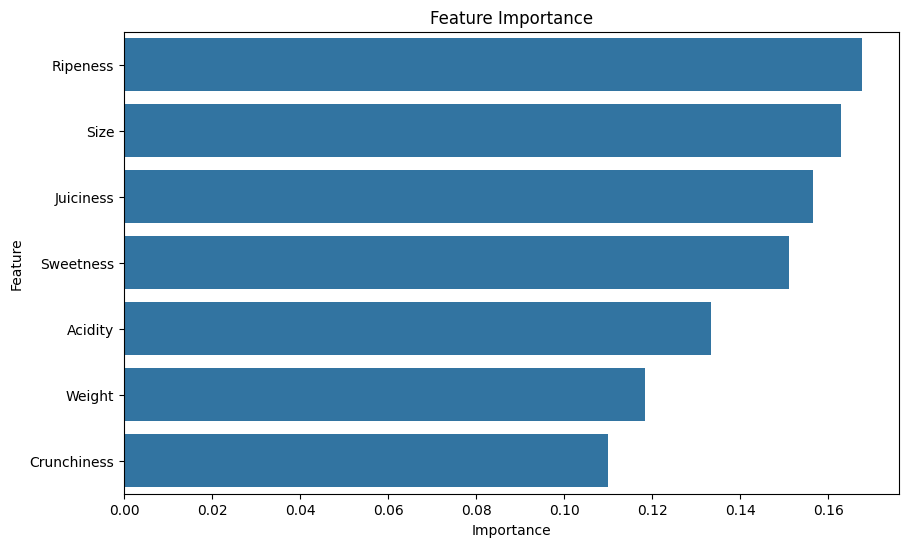

In [51]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n--- Feature Importance ---")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
plt.close()

# HyperTuning

In [52]:
# Hyperparameter tuning with GridSearchCV
print("\n--- Hyperparameter Tuning ---")
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search.fit(X_train_scaled, y_train)

print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


--- Hyperparameter Tuning ---
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.878125


In [53]:
# Train the model with the best parameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train_scaled, y_train)

# Make predictions with the best model
best_y_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the best model
print("\n--- Best Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, best_y_pred))
print("\nClassification Report:")
print(classification_report(y_test, best_y_pred))

print("\nConfusion Matrix:")
best_cm = confusion_matrix(y_test, best_y_pred)
print(best_cm)


--- Best Model Evaluation ---
Accuracy: 0.89625

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       401
           1       0.89      0.90      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800


Confusion Matrix:
[[358  43]
 [ 40 359]]


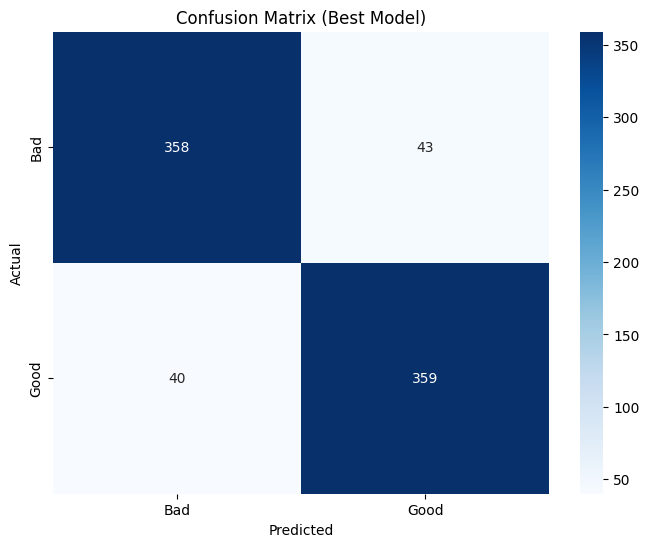

In [54]:
# Visualize confusion matrix for the best model
plt.figure(figsize=(8, 6))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Best Model)')
plt.show()
plt.close()